<a href="https://colab.research.google.com/github/pdenailly/Atelier_bikes/blob/main/ACTIVITE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Visualisation de base de données**

Application : Etude des volumes de cyclistes dans la ville de Paris en amont, pendant et après les JO 2024.


Bienvenu dans cet atelier ! Nous allons y explorer quelques manières simples de visualiser un jeux de données avant toute utilisation pour des travaux de modélisation.

Comme pour le premier atelier, nous nous intéresserons à des séries temporelles de traffic de vélo, comptés à chaque heure entre juin et août 2024 en plusieurs points de la ville de Paris. Ces données ont été extraites d'une [base ouverte mise à disposition par la ville de Paris](https://parisdata.opendatasoft.com/explore/dataset/comptage-velo-donnees-compteurs/api/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name&q.timerange.date=date:%5B2024-05-31T22:00:00Z+TO+2024-09-13T21:59:59Z%5D&basemap=jawg.dark&location=13,48.85652,2.35024&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJzdW1fY291bnRzIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiI0ZBOEM0NCJ9XSwieEF4aXMiOiJkYXRlIiwibWF4cG9pbnRzIjoiIiwidGltZXNjYWxlIjoibW9udGgiLCJzb3J0IjoiIiwiY29uZmlnIjp7ImRhdGFzZXQiOiJjb21wdGFnZS12ZWxvLWRvbm5lZXMtY29tcHRldXJzIiwib3B0aW9ucyI6eyJkaXNqdW5jdGl2ZS5pZF9jb21wdGV1ciI6dHJ1ZSwiZGlzanVuY3RpdmUubm9tX2NvbXB0ZXVyIjp0cnVlLCJkaXNqdW5jdGl2ZS5pZCI6dHJ1ZSwiZGlzanVuY3RpdmUubmFtZSI6dHJ1ZSwicmVmaW5lLmRhdGUiOiIyMDI0In19fV0sImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWUsInRpbWVzY2FsZSI6IiJ9). La période de Juillet 2024 a été marquée par la présence des Jeux Olympiques en région parisienne, l'un des mots d'ordres ayant été l'utilisation des mobilités douces, dont le vélo. A travers les différents ateliers proposés ici, nous allons nous intéresser à l'étude de ces données, et observer à quel point les jeux olympiques ont eu un impact sur le volume de cyclistes à Paris.

Assurez vous que le fichier de données *comptage-velo-donnees-compteurs.csv* soit présent dans le répertoire courant (sur colab, faites les glisser dans l'espace de stockage de la session avec le logo dossier à gauche). Ces fichiers sont disponibles sur le dépôt git de l'atelier : https://github.com/pdenailly/Atelier_bikes.


**Importation des librairies Python**

Nous allons travailler avec le language Python dans cet atelier. En amont de tout projet, il est toujours bon de rassembler les importations de librairies dans une section dédiée. Nous allons notamment travailler avec la librairie *matplotlib*, très adaptée à la visualisation de bases de données sous python. Nous utiliserons également *cartopy* qui nous sera utile pour la visualisation spatiale des données. Cette dernière librairie n'étant pas installée, nous l'installons dans l'environnement avant de l'importer avec les autres librairies.

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 67.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy

**Importation des données de comptages de vélos**

L'importation des données se fait avec la librairie pandas, via la fonction read_csv(.).

In [ ]:
#Importation des données de comptage vélos depuis le fichier .csv
bike_data = pd.read_csv('comptage-velo-donnees-compteurs.csv', sep=";", decimal='.').iloc[: , 1:]
bike_data

,Nom du compteur,Identifiant du site de comptage,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du site de comptage,Coordonnées géographiques
0,9 boulevard Jourdan O-E,300030120.0,9 boulevard Jourdan,33,2024-06-01T00:00:00+02:00,2023-01-24,"48.81964, 2.34173"
1,147 avenue d'Italie S-N,100056041.0,147 avenue d'Italie,23,2024-06-01T00:00:00+02:00,2019-12-10,"48.82009, 2.3588"
2,24 boulevard Jourdan E-O,300030116.0,24 boulevard Jourdan,27,2024-06-01T00:00:00+02:00,2023-01-24,"48.82029, 2.33936"
3,180 avenue d'Italie N-S,100056039.0,180 avenue d'Italie,45,2024-06-01T00:00:00+02:00,2019-12-11,"48.82048, 2.35873"
4,56 boulevard Kellermann E-O,300030139.0,56 boulevard Kellermann,20,2024-06-01T00:00:00+02:00,2023-01-25,"48.820988, 2.350291"
...,...,...,...,...,...,...,...
180869,Pont des Invalides N-S,NaN,NaN,10,2024-08-17T23:00:00+02:00,NaN,NaN
180870,27 quai de la Tournelle NO-SE,NaN,NaN,33,2024-08-17T23:00:00+02:00,NaN,NaN
180871,27 quai de la Tournelle SE-NO,NaN,NaN,30,2024-08-17T23:00:00+02:00,NaN,NaN
180872,Quai des Tuileries NO-SE,NaN,NaN,0,2024-08-17T23:00:00+02:00,NaN,NaN


**Boîtes à moustache**

Commençons par représenter l'étendue de nos données de comptages (médianes, quartiles, etc.). Pour cela construisez la boite à moustache (boxplot) de la colonne 'Comptage horaire'. Pour cela nous utiliserons pandas et sa fonction 'boxplot()' ([aide ici](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)). Qu'observez vous ?

<Axes: >

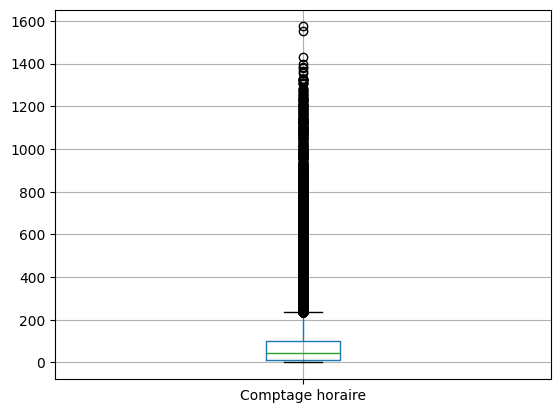

In [ ]:
boxplot_comptages = ...
boxplot_comptages

Représentez maintenant, toujours avec boxplot(), les boites à moustaches pour les deux capteurs dont les noms sont '24 boulevard Jourdan E-O' et 'Pont des Invalides N-S'. Pour cela passez par la construction d'une base 'bike_data_spread' où les colonnes représentent les noms de capteurs et les valeurs sont les comptages horaires (inspirez vous de l'activité 1). Construisez ensuite les boites à moustache à partir des colonnes correspondantes aux deux capteurs souhaités. Comparez les deux boites à moustache, quel capteur présente un trafic médian supérieur ?


<Axes: >

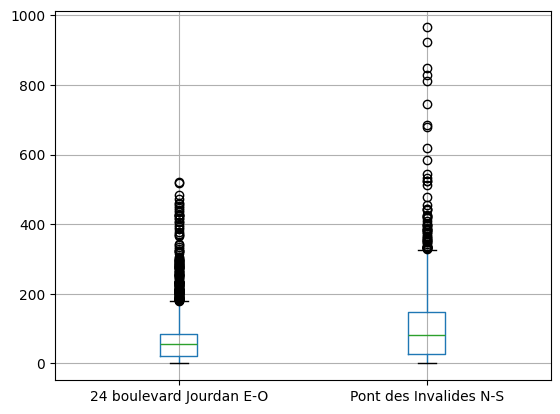

In [ ]:
bike_data_spread = ...
boxplot_2_capteurs = ...
boxplot_2_capteurs

**Profils temporels des séries**

Dans cette section nous allons nous intéresser à l'aspect temporel des comptages. Dans le cadre de l'étude de séries temporelles, comme c'est le cas ici, il est fondamental de chercher si les séries présentes des patterns et si oui, à quelle échelle temporelle. Nous allons manipuler des jours et des heures ici, nous devons donc créer deux nouvelles colonnes : 'Date' et 'Heure'.

In [ ]:
#Conversion des chaines de caractère en objets datetime
bike_data['Date et heure de comptage'] = pd.to_datetime(bike_data['Date et heure de comptage'])

#Extraction date
bike_data['Date'] = bike_data['Date et heure de comptage'].dt.date.astype(str)

# Extraire heure
bike_data['Heure'] = bike_data['Date et heure de comptage'].dt.time.astype(str)

Pour commencer nous allons visualiser l'évolution de la somme de tous les comptages à chaque jour. Créez une nouvelle base 'bike_data_days' qui aggrège les traffics journaliers sur l'ensemble de la ville. Utilisez pour cela 'groupby' sur bike_data où vous sommez (sum()) les 'Comptage horaire' pour chaque 'Date'. Sur cette base appliquez la [fonction 'plot()' de pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html). Spécifiez une taille de sortie de la figure figsize = (18,6), ainsi que les options "marker='o'" et "linestyle='-'" afin d'obtenir un point de comptage à chaque jour.


<Axes: xlabel='Date'>

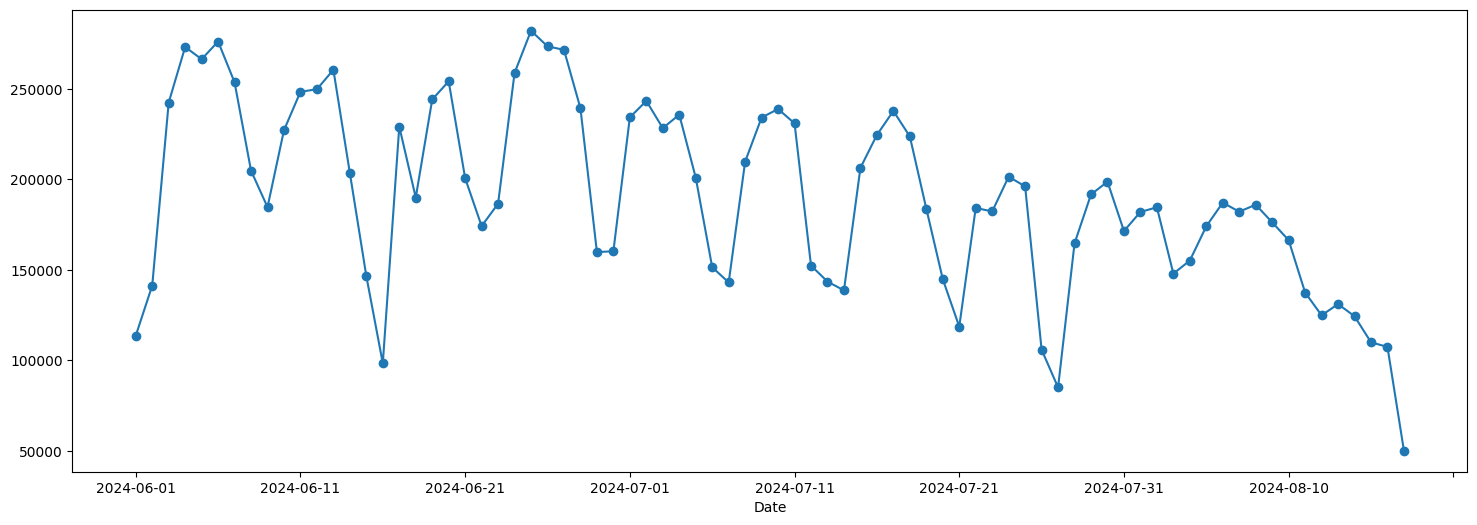

In [ ]:
bike_data_days = ...
bike_data_days.plot(
    figsize=(18, 6),
    marker='o',
    linestyle='-')

Il est difficile d'interpéter ces évolutions, car à cette échelle là il y a un effet du jour de semaine (fréquentations potentiellement différentes en semaine et le weekend), et un effet de la période (grandes vacances, JOs, etc.). Pour bien se rendre compte de cela, nous allons visualiser l'effet de chaque jour de la semaine sur le volume de traffic.  Tout d'abord nous créons une colonne 'Jour de la semaine', à la base 'bike_data_days', qui associe à chaque jour son nom (lundi, mardi, etc.). Nous ordonnons ces jours au sein d'une variable Catégorielle (ordered_days). Calculez une nouvelle base bike_data_daytypes qui rassemble pour chaque type de jour (lundi, mardi,etc.) la médiane des comptages totaux journaliers. Visualisez ensuite cette nouvelle base avec plot(), et les même options que vous avez utilisé dans le graphique précédent. Décrivez le profil obtenu. Quel est le jour de la semaine le plus fréquenté par les cyclistes d'après la médiane ?

<ipython-input-10-81f21f844022>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_data_days.groupby('Jour de la semaine')['Comptage horaire'].median().plot(


<Axes: xlabel='Jour de la semaine'>

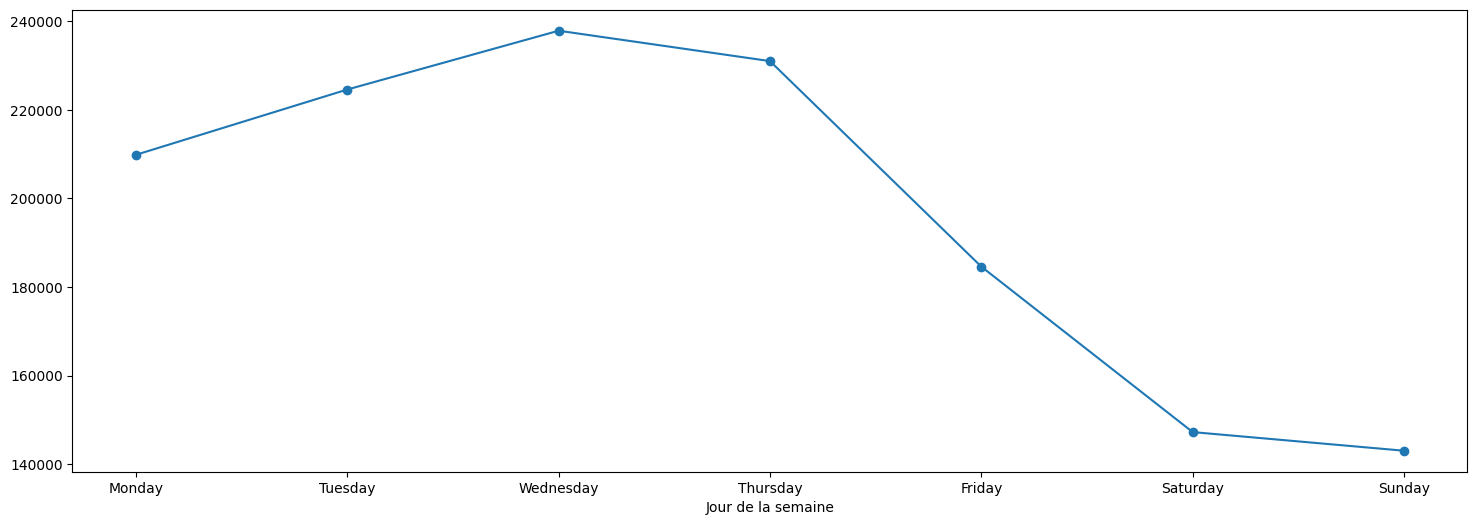

In [ ]:
bike_data_days = bike_data_days.reset_index()
bike_data_days['Jour de la semaine'] = pd.to_datetime(bike_data_days['Date']).dt.day_name()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bike_data_days['Jour de la semaine'] = pd.Categorical(
    bike_data_days['Jour de la semaine'],
    categories=ordered_days,
    ordered=True
)
bike_data_daytypes = ...
bike_data_daytypes.plot(
    figsize=(18, 6),
    marker='o',
    linestyle='-')

Maintenant que nous avons vu comment était le traffic médian pour chaque jour de la semaine, essayons de voir si un impact des vacances d'été, et des Jeux Olympiques est visible dans nos données. Créez une nouvelle base 'bike_data_friday' à partir de la base bike_data_days sur laquelle vous filtrez uniquement les vendredi ('Friday') de la colonne 'Jour de la semaine'. Pour rappel sur Python, pour filtrer la valeur 'a' d'une colonne 'A' sur une base 'df', la syntaxe est la suivante : df[df['A']=='a'].
Représentez ensuite avec plot() la colonne 'Comptage horaire', vous obtenez les traffics journaliers de tous les vendredi au cours de Juin à Août. Que remarquez vous ? Y a t-il un effet des vacances d'été ? Y a t-il un effet des JOs (cérémonie d'ouverture le vendredi 26 Juillet, puis JOs les 02 et 09 Août) ?


<Axes: xlabel='Date'>

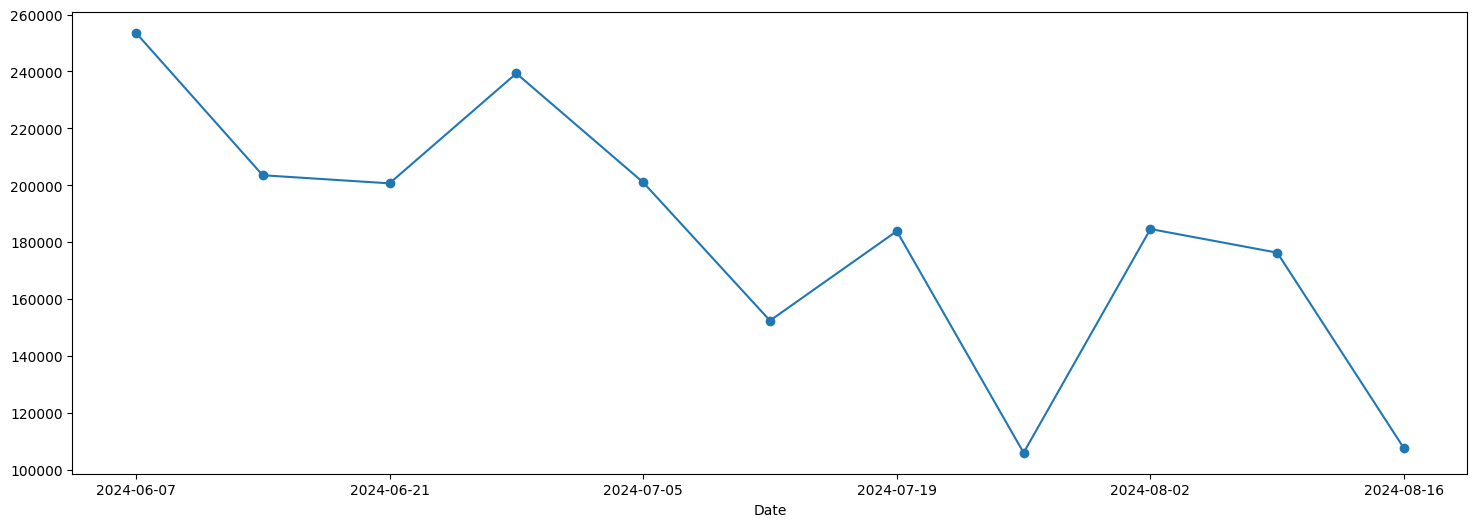

In [ ]:
bike_data_friday = ...
bike_data_friday = bike_data_friday.set_index('Date')
bike_data_friday['Comptage horaire'].plot(...)

Nous allons maintenant revenir à une échelle temporelle plus fine et observer l'effet des heures de la journée sur les fréquentations. Nous souhaitons observer les traffics médians, par heure et par type de jour (jour travaillé, du lundi au vendredi VS jour de week-end, le samedi et le dimanche).

Pour cela nous partons de la base bike_data pour laquelle nous créons la colonne 'Jour de la semaine' à partir de la colonne 'Date' comme nous l'avons fait précédemment. Nous créeons ensuite une base 'bike_data_semaine' (qui contient uniquement les jours de semaine). La syntaxe pour filtrer plusieurs valeurs 'a','b' d'une colonne 'A' est la suivante : df[df['A'].isin(['a','b'])] (ici vous filtrez donc le lundi, mardi,..., vendredi). Créez ensuite une base 'bike_data_semaine_sum', qui contient la somme des traffics de tous les sites de comptage à chaque jour et à chaque heure. Inspirez vous de la manière dont nous avons construit 'bike_data_days', mais ici vous sommez sur 'Date' ET 'Heure'. Enfin calculez les médianes de traffic par heure et représentez le profil obtenu sous la forme d'un plot().

Décrivez le profil obtenu. Quelles sont les heures les plus fréquentées ? Quel phénomène cela traduit-il ?

<Axes: xlabel='Heure'>

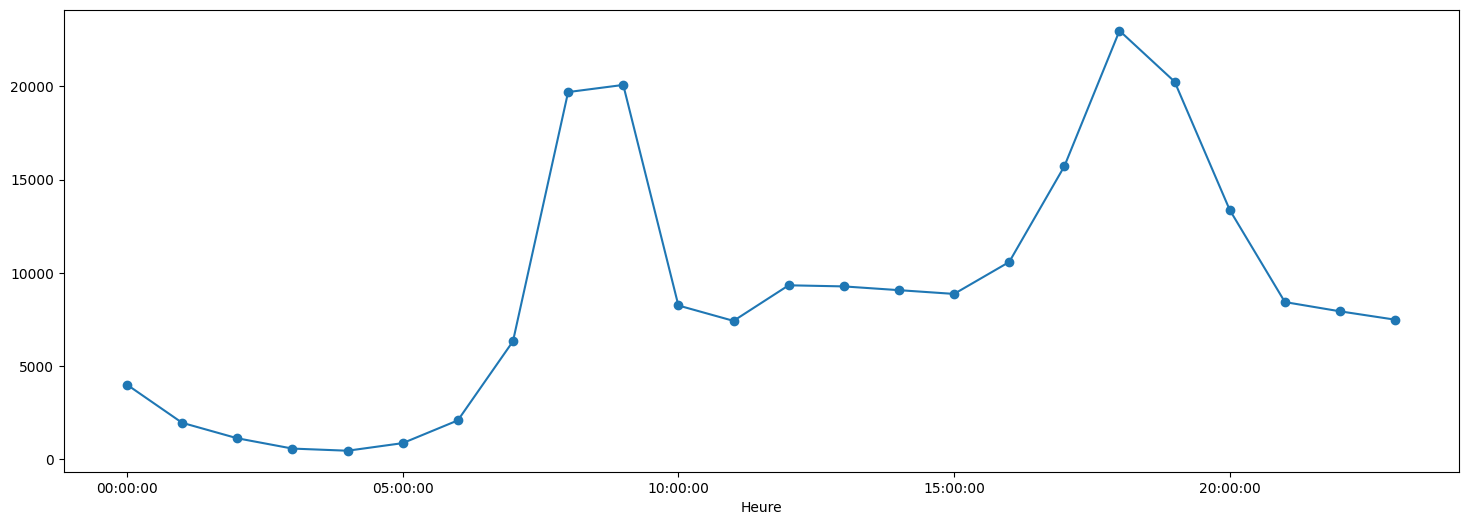

In [ ]:
bike_data['Jour de la semaine'] = ...
bike_data_semaine = ...
bike_data_semaine_sum = ...
bike_data_semaine_sum = bike_data_semaine_sum.reset_index()
bike_data_semaine_sum_median_heure = ...

bike_data_semaine_sum_median_heure.plot(
    figsize=(18, 6),
    marker='o',
    linestyle='-')

Faites le même travail pour les jours de week-end. Le profil est-il semblable à celui des jours de semaine ? Pourquoi ?

<Axes: xlabel='Heure'>

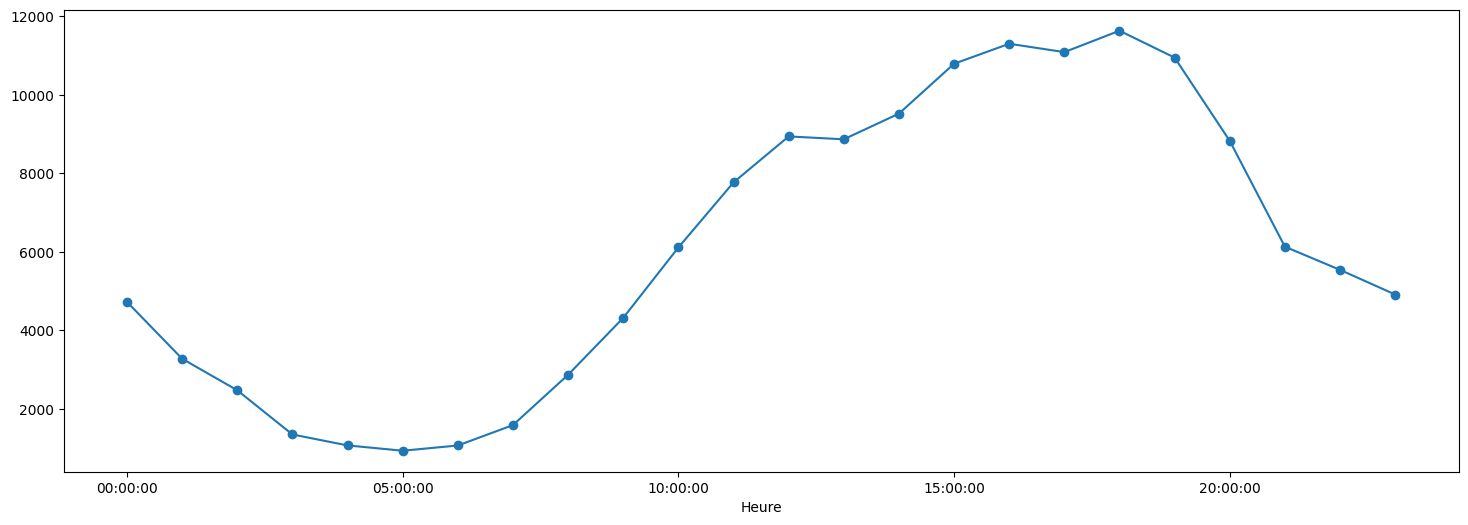

In [ ]:
bike_data_weekend = ...
bike_data_weekend_sum = ...
bike_data_weekend_sum = bike_data_weekend_sum.reset_index()
bike_data_weekend_sum_median_hour = ...

bike_data_weekend_sum_median_hour.plot(
    figsize=(18, 6),
    marker='o',
    linestyle='-')

Pour plus de facilités dans la comparaison, nous pouvons utiliser la syntaxe de matplotlib qui propose une plus grande flexibilité dans la représentation graphique. Le code ci dessous crée un objet 'plot()' d'une certaine taille. Les deux courbes (semaine et weekend) sont ensuite ajoutées au plot. Nous pouvons ensuite spécifier des titres d'aces, une légende, etc. Le résultat permet de comparer plus efficacement les profils médians entre les jours de semaine et les jours de weekend.

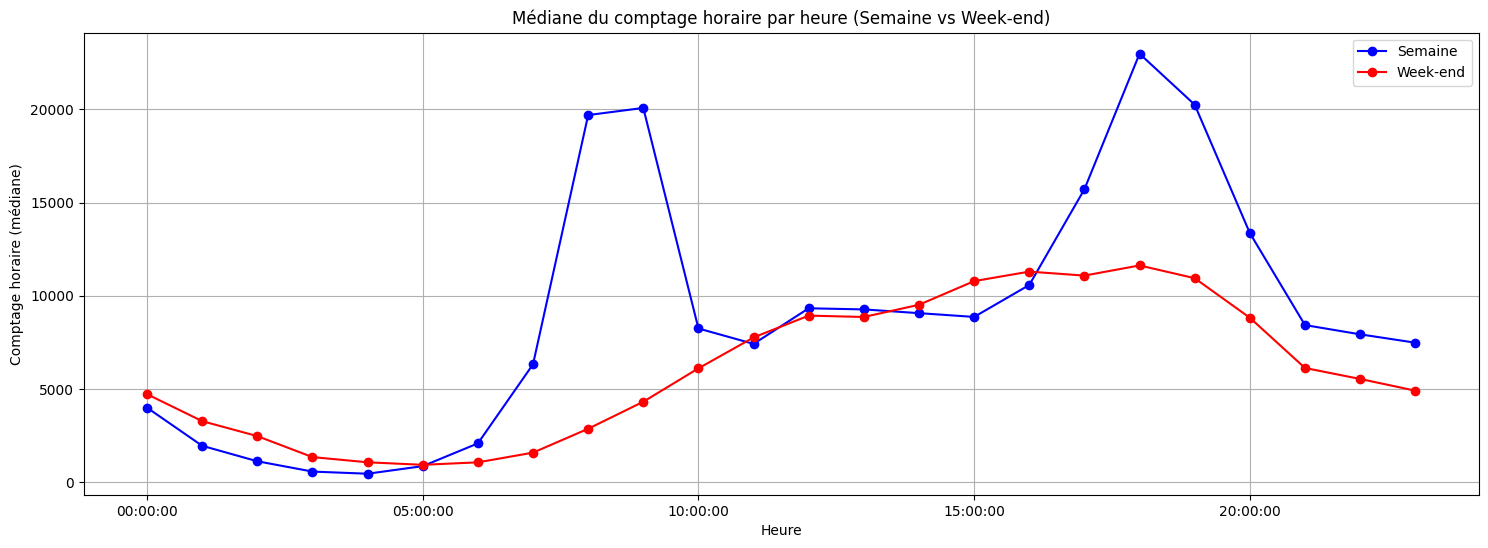

In [ ]:
# Créez une figure pour les deux séries
plt.figure(figsize=(18, 6))

# Tracez la courbe pour les jours de semaine
bike_data_semaine_sum.groupby('Heure')['Comptage horaire'].median().plot(
    marker='o',
    linestyle='-',
    color='blue',
    label='Semaine'
)

# Tracez la courbe pour les week-ends
bike_data_weekend_sum.groupby('Heure')['Comptage horaire'].median().plot(
    marker='o',
    linestyle='-',
    color='red',
    label='Week-end'
)

# Ajoutez des légendes et des labels
plt.xlabel('Heure')
plt.ylabel('Comptage horaire (médiane)')
plt.title('Médiane du comptage horaire par heure (Semaine vs Week-end)')
plt.legend()  # Affiche la légende pour distinguer les courbes
plt.grid(True)  # Ajoute une grille pour mieux lire les données

# Affichez le graphique
plt.show()

Nous allons maintenant passer à une étude davantage axée sur les capteurs de comptages, donc une étude plutôt orientée sur l'aspect spatial.

**Visualisations spatiales**

Dans l'activité 1, nous nous sommes intéressé à l'étude des corrélation entre les capteurs de comptage. Ces dernières traduisent à quel point chaque paires de séries sont liées (positivement ou négativement) et prennent leurs valeurs dans l'intervalle [-1,1]. Il peut être intéressant de visualiser les "matrices de corrélations" afin de comprendre rapidement si des groupes de séries (capteurs de comptages ici) sont corrélés positivement ou négativement. Si nous disposons de M séries de comptages, une matrice de corrélation est une matrice de dimension MxM qui rapporte les corrélations pour chaque paire de séries. Nous créons un objet 'corr_matrix' la matrice de corrélation construite à partir de 'bike_data_spread' (voir Activité 1). Les corrélations sont ici contruites à partir de l'ensemble de la période. Qu'observez vous ?

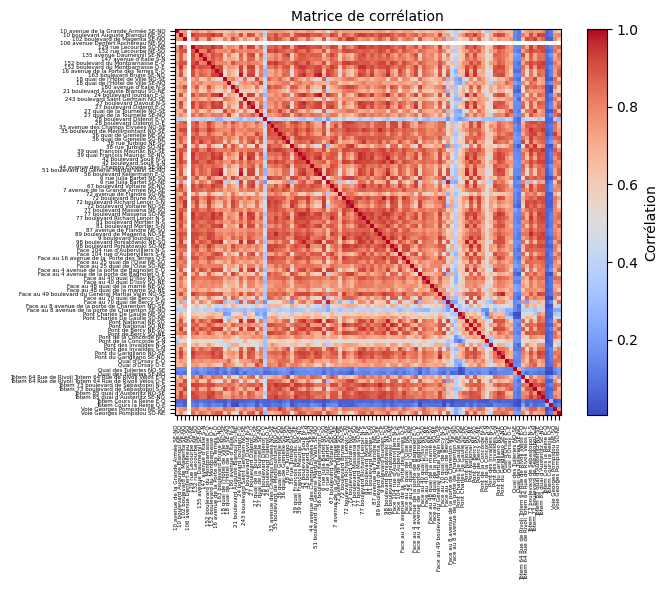

In [ ]:
corr_matrix = bike_data_spread.corr()

# Création de la figure
plt.figure(figsize=(8, 6))

# Quelques éléments pour la visualisation
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Corrélation', fraction=0.046, pad=0.04)

# Labels avec une taille réduite
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90, fontsize=4)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns, fontsize=4)

# Titre avec une taille réduite
plt.title('Matrice de corrélation', fontsize=10)

# Marges ajustées
plt.tight_layout()
plt.show()

Construisez maintenant deux nouvelles matrices de corrélation 'corr_matrix_8h' et 'corr_matrix_15h', qui correspondent aux matrices de corrélation entre les séries de comptages filtrées sur les jours de semaine (lundi au vendredi) à 8h et 15h respectivement. Pour cela nous construisons d'abord les colonnes 'Jour de semaine' et 'Heure' pour la table bike_data_spread (inspirez vous de ce que nous avons vu précédemment pour construire ces colonnes sur bike_data). Ensuite nous allons construire deux bases 'bike_data_spread_week_8h' et 'bike_data_spread_week_15h' pour lesquelles vous filtrez les jours de semaine et les heures associées ('08:00:00' ou '15:00:00'). Avec pandas vous pouvez filtrer selon deux conditions (condition A et conditionB) avec la synthaxe suivante : df_filt = df[('conditionA')&('conditionB')]. Cela vous permettra de filtrer les lignes qui respectent la condition A ET la condition B. Construisez les matrices de correlation sur ces deux bases. Visualisez ensuite les deux matrices de corrélation. Que remarquez vous ?

In [ ]:
#Construction des colonnes 'Jour de la semaine' et 'Heure' pour la table bike_data_spread
bike_data_spread.reset_index(inplace=True)
bike_data_spread['Date et heure de comptage'] = ...
bike_data_spread['Jour de la semaine'] = ...
bike_data_spread['Heure'] = ...

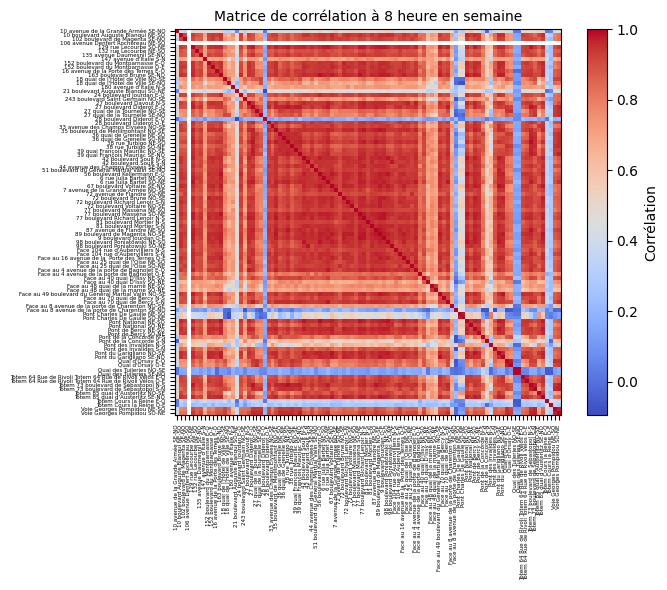

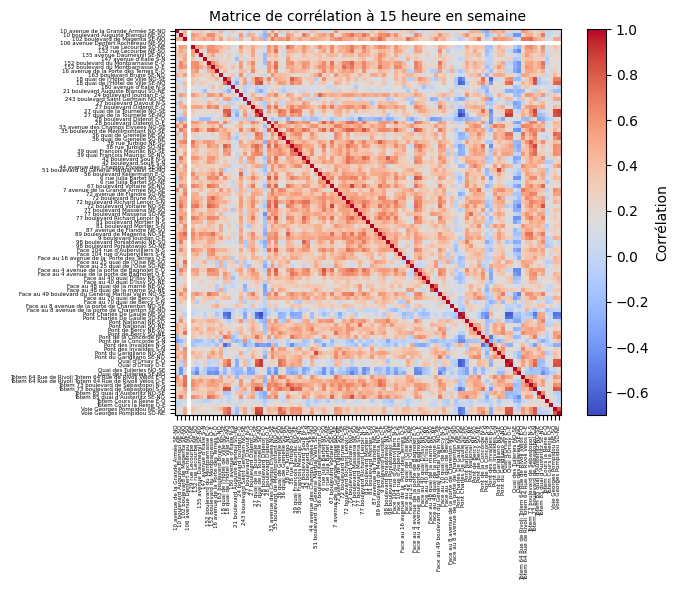

In [ ]:
#Construction des bases filtrées
bike_data_spread_week_8h = ...
bike_data_spread_week_15h = ...

#Retirer les colonnes non numériques (noms de jours, heures, etc.)
bike_data_spread_week_8h = bike_data_spread_week_8h.drop(columns=['Date et heure de comptage', 'Jour de la semaine', 'Heure'])
bike_data_spread_week_15h = bike_data_spread_week_15h.drop(columns=['Date et heure de comptage', 'Jour de la semaine', 'Heure'])

#Construction des matrices de corrélation
corr_matrix_8h = ...
corr_matrix_15h = ...

#Visu matrice 8h
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix_8h, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Corrélation', fraction=0.046, pad=0.04)
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90, fontsize=4)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns, fontsize=4)
plt.title('Matrice de corrélation à 8 heure en semaine', fontsize=10)
plt.tight_layout()
plt.show()

#Visu matrice 15h
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix_15h, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Corrélation', fraction=0.046, pad=0.04)
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90, fontsize=4)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns, fontsize=4)
plt.title('Matrice de corrélation à 15 heure en semaine', fontsize=10)
plt.tight_layout()
plt.show()

D'un point de vue purement spatial, nous allons nous intéresser à l'aspect géographique des données. La base bike_data dispose d'une colonne 'Coordonnées géographiques' qui intègre les positions (latitudes et longitudes) des capteurs. Nous allons utiliser cette information dans cette dernière partie de l'activité.

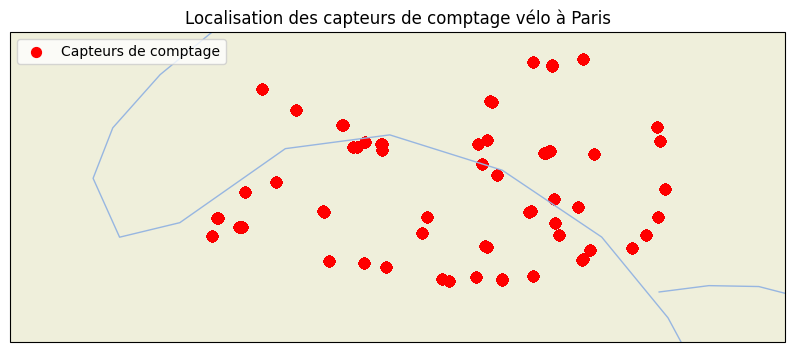

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

bike_data['Latitude'] = bike_data['Coordonnées géographiques'].str.split(',').str[0].astype(float)
bike_data['Longitude'] = bike_data['Coordonnées géographiques'].str.split(',').str[1].astype(float)


# Création de la figure avec projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([2.2, 2.45, 48.8, 48.9])  # Zoom sur Paris

# Ajout de fonds de carte (routes, rivières, etc.)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.RIVERS)

# Ajout des capteurs
ax.scatter(bike_data['Longitude'], bike_data['Latitude'], color='red', marker='o', s=50, label="Capteurs de comptage")

# Ajouter une légende et un titre
plt.legend()
plt.title("Localisation des capteurs de comptage vélo à Paris")

# Afficher la carte
plt.show()

Merci pour votre travail, c'est la fin de cette activité. Dans la prochaine nous nous pencherons sur le clustering des données.